In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

In [2]:
def logsense(m,m0,mr):
    return 1.0/(1.0 + (m/m0)**(-1.0/mr))

def con_plot(name, style, label, n=20, ax = plt):
    m = np.logspace(-4,7,n)
    f = np.power(10, np.loadtxt(name))
    m = m[~np.isnan(f)]
    f = f[~np.isnan(f)]
    #print(m,f)
    
    print(label)
    ax.loglog(m,f/logsense(m,1e-2,0.5), style, label = label)

#for now, assume a DM-star mass ratio of 100:1, to get dual axes when comparing to fraction of baryonic stars, and fraction of DM
DM_star_ratio = 100

filetype = 'pdf'

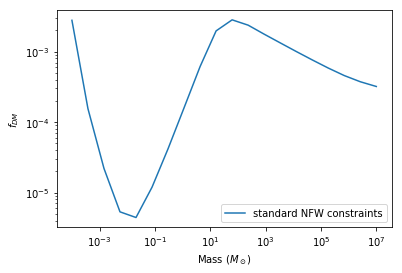

In [145]:
m = np.logspace(-4,7,20)

f = np.loadtxt('test.txt')

m = m[~np.isnan(f)]
f = f[~np.isnan(f)]

plt.loglog(m,f/logsense(m,1e-2,0.5), label = 'standard NFW constraints')
#plt.loglog(m,f, label = 'no sense')

plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('$f_{DM}$')
plt.legend()

plt.savefig('./figures/testcase.png')
plt.show()

In [146]:
print(m, f/logsense(m,1e-2,0.5))

[1.00000000e-04 3.79269019e-04 1.43844989e-03 5.45559478e-03
 2.06913808e-02 7.84759970e-02 2.97635144e-01 1.12883789e+00
 4.28133240e+00 1.62377674e+01 6.15848211e+01 2.33572147e+02
 8.85866790e+02 3.35981829e+03 1.27427499e+04 4.83293024e+04
 1.83298071e+05 6.95192796e+05 2.63665090e+06 1.00000000e+07] [2.78057706e-03 1.55002993e-04 2.20058248e-05 5.32401465e-06
 4.42239176e-06 1.19069063e-05 4.17798556e-05 1.59530290e-04
 6.12982965e-04 1.96769559e-03 2.82329467e-03 2.37299600e-03
 1.76848798e-03 1.33145750e-03 1.00445791e-03 7.62870189e-04
 5.84522132e-04 4.57250761e-04 3.73675764e-04 3.19928555e-04]


0.05% baryon error
0.2% baryon error
1% baryon error
5% baryon error
20% baryon error
100% baryon error


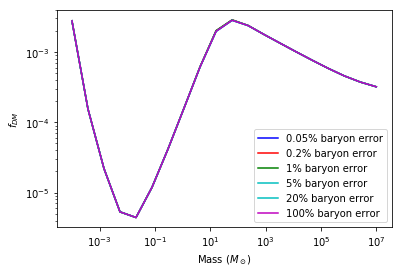

In [109]:
con_plot('n_100_error_0.0005.txt', 'b-', '0.05% baryon error')
con_plot('n_100_error_0.002.txt', 'r-', '0.2% baryon error')
con_plot('n_100_error_0.01.txt', 'g-', '1% baryon error')
con_plot('n_100_error_0.05.txt', 'c-', '5% baryon error')
con_plot('n_100_error_0.2.txt', 'c-', '20% baryon error')
con_plot('n_100_error_1.0.txt', 'm-', '100% baryon error')

plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('$f_{DM}$')
plt.legend()

#plt.xlim(1,100)
#plt.ylim(1e-4, 1e-3)
plt.show()


Core

LMC

100 LoS



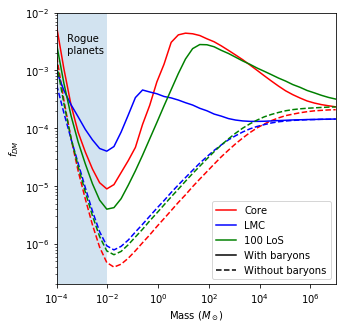

In [142]:
plt.figure(figsize = [5,5])
ax = plt.axes()

con_plot('sbc_core_bar.txt', 'r-', 'Core', n=40)
con_plot('sbc_core_nobar.txt', 'r--', '', n=40)

con_plot('sbc_lmc_bar.txt', 'b-', 'LMC', n=40)
con_plot('sbc_lmc_nobar.txt', 'b--', '', n=40)

con_plot('sbc_n20_bar.txt', 'g-', '100 LoS', n=40)
con_plot('sbc_n20_nobar.txt', 'g--', '', n=40)

plt.plot(0, 0, 'k-', label = 'With baryons')
plt.plot(0, 0, 'k--', label = 'Without baryons')


rect = Rectangle((1e-5,1e-7), (1e-2-1e-5), 1, alpha=0.2)
ax.add_patch(rect)
plt.text(2e-4,2e-3, ' Rogue \n planets')


plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('$f_{DM}$')
plt.xlim(1e-4,1e7)
plt.ylim(2e-7, 1e-2)
plt.legend()
plt.savefig('./figures/core_baryons_compare.{}'.format(filetype))
plt.show()

No survey time
One year
Twelve years


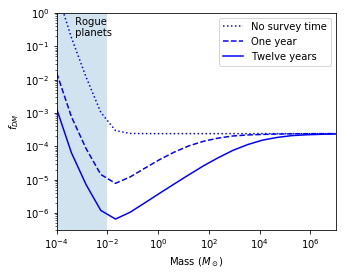

In [154]:
plt.figure(figsize = [5,4])
ax = plt.axes()

con_plot('time_notime.txt', 'b:', 'No survey time')
con_plot('time_1yr.txt', 'b--', 'One year')
con_plot('time_fulltime.txt', 'b-', 'Twelve years')

rect = Rectangle((1e-5,3e-7), (1e-2-1e-5), 1, alpha=0.2)
ax.add_patch(rect)
plt.text(4e-4,2e-1, ' Rogue \n planets')

plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('$f_{DM}$')
plt.xlim(1e-4,1e7)
plt.ylim(3e-7,1)

plt.legend()
plt.savefig('./figures/runtime.{}'.format(filetype))
plt.show()

['sphericality_0.01.txt' 'sphericality_0.06.txt' 'sphericality_0.11.txt'
 'sphericality_0.16.txt' 'sphericality_0.21.txt' 'sphericality_0.26.txt'
 'sphericality_0.305.txt' 'sphericality_0.355.txt'
 'sphericality_0.405.txt' 'sphericality_0.455.txt'
 'sphericality_0.505.txt' 'sphericality_0.555.txt'
 'sphericality_0.605.txt' 'sphericality_0.655.txt' 'sphericality_0.7.txt'
 'sphericality_0.75.txt' 'sphericality_0.8.txt' 'sphericality_0.85.txt'
 'sphericality_0.9.txt' 'sphericality_0.95.txt' 'sphericality_1.0.txt']


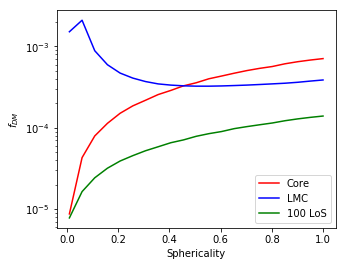

In [4]:
import glob
listing = np.sort(glob.glob("sphericality_*"))

print(listing)

f_array = np.zeros([3,21])

i = 0
for name in listing:
    file = np.loadtxt(name)
    f_array[:,i] = np.power(10,file)/logsense(1.0,1e-2,0.5)
    i = i+1
    
labels = np.array(['Core', 'LMC', '100 LoS', '20 LoS', '100 LoS'])
styles = np.array(['r-', 'b-', 'g-', 'g--', 'g-'])
q = np.linspace(0.01, 1.0, 21)

plt.figure(figsize = [5,4])

for j in np.array([0,1,2]):
    plt.semilogy(q, f_array[j,:], styles[j], label = labels[j])
                   

plt.legend()
plt.ylabel('$f_{DM}$')
plt.xlabel('Sphericality')
plt.savefig('./figures/sphericality.{}'.format(filetype))
                   
plt.show()

1.2218487496163564


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


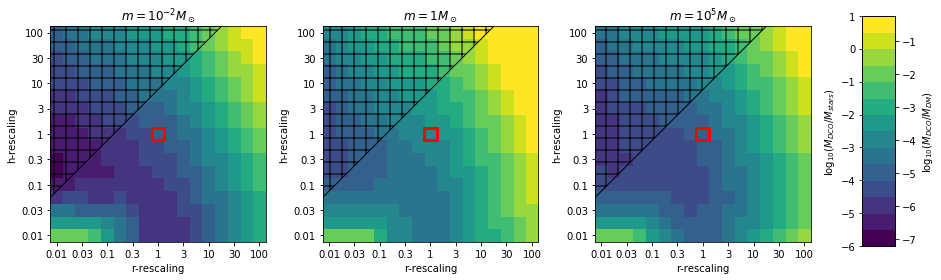

In [103]:
import matplotlib.patches as patches
from matplotlib.colors import Colormap

def DD_grid(m, ax):
    f = np.loadtxt('rescaled_disk_m{}.txt'.format(str(m)))
    Qr = np.logspace(-2,2,num = 17)
    Qz = np.logspace(-2,2,num = 17)
    
    s = 17

    f = np.transpose(f)
    f = np.flip(f, 0)
    #print(qr_matrix)
    #print(qz_matrix)
    #print(fmatrix)

    #fig,(ax1, ax2, ax3) = plt.subplots(1,3)
    #fig,ax = plt.subplots(1)

    cmap = plt.cm.get_cmap('viridis', 14)
    im = ax.imshow(f, cmap = cmap)

    ax.set_ylabel('h-rescaling')
    ax.set_xlabel('r-rescaling')

    ax.set_yticks([0,2,4,6,8,10,12,14,16], ['100', '30', '10', '3', '1', '0.3','0.1', '0.03', '0.01'])
    ax.set_xticks([0,2,4,6,8,10,12,14,16], ['100', '30', '10', '3', '1', '0.3','0.1', '0.03', '0.01'])


    rect = patches.Rectangle((7.5,7.5),1,1,linewidth=3,edgecolor='r',facecolor='none')

    ax.add_patch(rect)
    
    yp = 13
    xp = 13
    points = np.array([[-0.5, -0.5], [-0.5,yp], [xp,-0.5]])
    shade = patches.Polygon(points, fill = False, hatch = '+', )
    
    ax.add_patch(shade)

    
    
    #plt.show()
    return im

fig,(ax1, ax2, ax3) = plt.subplots(1,3, subplot_kw = {'aspect':'equal'})

fig.set_figheight(4)
fig.set_figwidth(15)

im1 = DD_grid(0.01, ax1)
im2 = DD_grid(1.0, ax2)
im3 = DD_grid(100000.0, ax3)

ax1.set_title('$m = 10^{-2} M_\odot$')
ax2.set_title('$m = 1 M_\odot$')
ax3.set_title('$m = 10^{5} M_\odot$')

Qr = np.logspace(-2,2,num = 17)
Qz = np.logspace(-2,2,num = 17)
        

plt.setp((ax1, ax2, ax3), xticks = [0,2,4,6,8,10,12,14,16], xticklabels = ['0.01', '0.03', '0.1','0.3','1','3', '10', '30', '100'], yticks = [0,2,4,6,8,10,12,14,16], yticklabels = ['100', '30', '10', '3','1', '0.3','0.1','0.03', '0.01'])

fig.subplots_adjust(right=1.75)
cbar_ax = fig.add_axes([0.90, 0.13, 0.03, 0.8])
c = fig.colorbar(im3, cax=cbar_ax)

#pos = cbar.ax.get_position()
#ax1 = cbar.ax
cbar_ax.set_aspect('auto')

cfac = np.log10(1/0.06)
print(cfac)

lim = -6

cbar_ax2 = cbar_ax.twinx()
cbar_ax2.set_ylim([lim-cfac, 1-cfac])

im3.set_clim(lim,1)
im2.set_clim(lim,1)
im1.set_clim(lim,1)

cbar_ax.yaxis.set_label_position('left')
cbar_ax.set_ylabel('$\log_{10}(M_{DCO}/M_{stars})$')

cbar_ax2.set_ylabel('$\log_{10}(M_{DCO}/M_{DM})$')

#plt.show()

plt.tight_layout()

plt.savefig('./figures/DD_grid_hatch.{}'.format(filetype))

plt.show()

Rescaled by 30.0
Rescaled by 10.0
Rescaled by 3.0
Rescaled by 1.0
Rescaled by 0.3
Rescaled by 0.1
Rescaled by 0.03
Rescaled by 0.01
16.666666666666668


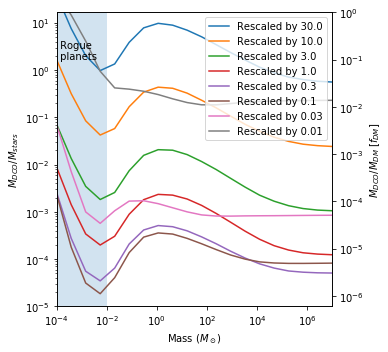

In [166]:
qlist = np.array([0.01, 0.03, 0.1, 0.3, 1, 3.0, 10, 30])
#qlist = np.array([100.0])
clist = np.linspace(0,1,7)

fig, ax1 = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(5.5)
#plt.figure(figsize = [5,4])
ax2 = ax1.twinx()

c = 0
cstep = 1.0/7.0
for q in np.flip(qlist):
    name = 'rescaled_DD_mass_q{}.txt'.format(str(q))
    
    con_plot(name, '', 'Rescaled by {}'.format(str(q)), ax = ax1)
    
    c = c+cstep
    
    
DM_star_ratio = 1/0.06
print(DM_star_ratio)
ax1.set_xlim(1e-4, 1e7)
ax1.set_ylim(1e-5, DM_star_ratio)

ax2.loglog()
ax2.set_ylim(1e-5/DM_star_ratio, 1)
ax1.set_xlabel('Mass ($M_\odot$)')
ax1.set_ylabel('$M_{DCO}/M_{stars}$')
ax2.set_ylabel('$M_{DCO}/M_{DM} \; [f_{DM}$]')

rect = Rectangle((1e-5,1e-5), (1e-2-1e-5), 1e2, alpha=0.2)
ax1.add_patch(rect)
plt.text(1e-4,1e-1, ' Rogue \n planets')


#ax2.set_yticks(np.power(10.0, np.arange(-7, 1)), minor=False)
#ax1.set_yticks(np.power(10.0, np.arange(-5, 3)), minor=False)
plt.minorticks_off()
ax1.legend(loc = 'upper right')
plt.tight_layout()
plt.savefig('./figures/darkdisk_massconstraints.{}'.format(filetype))
plt.show()




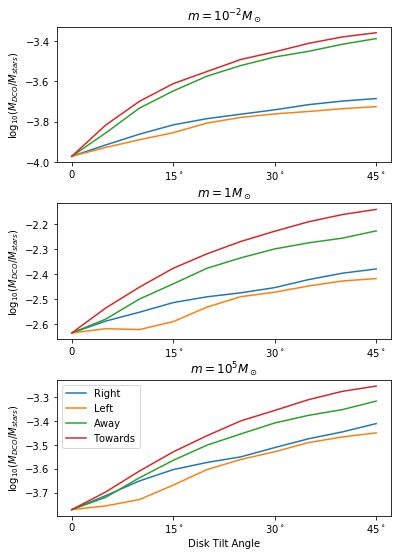

In [181]:
#tilted disk

def tiltdiskplot(m, ax):
    con = np.loadtxt('result_array_tiltdisk_{}.txt'.format(str(m)))
    
    phi = np.linspace(0, np.pi*45/180, 10)
    
    ax.plot(phi, con[:,0], label = 'Right')
    ax.plot(phi, con[:,2], label = 'Left')
    
    ax.plot(phi, con[:,1], label = 'Away')
    ax.plot(phi, con[:,3], label = 'Towards')
    
    ax.set_ylabel('$\log_{10}(M_{DCO}/M_{stars})$')
    
    
    xmarks = np.linspace(0,np.pi/4,4)
    ax.set_xticks(xmarks)
    ax.set_xticklabels(['0', '$15^\circ$', '$30^\circ$', '$45^\circ$'])

    #ax.legend()
   
    #print(con)
 

fig,(ax1, ax2, ax3) = plt.subplots(3,1, sharex = False)

fig.set_figheight(9)
fig.set_figwidth(6)

plt.subplots_adjust(hspace = 0.3)


tiltdiskplot(0.01, ax1)
tiltdiskplot(1.0, ax2)
tiltdiskplot(100000.0, ax3)

ax1.set_title('$m = 10^{-2} M_\odot$')
ax2.set_title('$m = 1 M_\odot$')
ax3.set_title('$m = 10^{5} M_\odot$')


#xmarks = np.linspace(0,np.pi/4,4)
#plt.xticks(xmarks, ['0', '$5^\circ$', '$10^\circ$', '$15^\circ$', '$20^\circ$', '$25^\circ$', '$30^\circ$', '$35^\circ$', '$40^\circ$', '$45^\circ$'])
#plt.xticks(xmarks, ['0', '$15^\circ$', '$30^\circ$', '$45^\circ$'])
plt.legend()
ax3.set_xlabel('Disk Tilt Angle')
    
plt.savefig('./figures/tiltdisk.{}'.format(filetype))
plt.show()

[-3.14905202 -3.41181997 -3.23877789 -3.38286516 -3.66051928 -3.92290887
 -3.85519128 -3.90879637 -3.93685073 -3.93940088  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


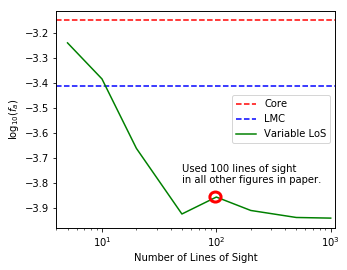

In [9]:
f = np.loadtxt('n_LoS_mNFW.txt')

frand = np.loadtxt('n_LoS_mNFW_testrand.txt')
frand = frand[2:]

print(f)
#f = np.power(10,f)
#print(f)
f_core = f[0]
f_lmc = f[1]
f_los = f[2:10]
#f_los_m2 = f[11:20]
#f_los_m5 = f[20:29]

#f_new = np.loadtxt('n_LoS_mNFW_test_long.txt')
#f_new = f_new[2:]


#f_total = np.zeros([3,8])
#for i in np.arange(8):
    #f_total[:,i] = np.concatenate((f_los[i:i+1],frand[3*i:3*i+3]))
#    f_total[:,i] = frand[3*i:3*i+3]
    
    
#f_mean = np.mean(f_total, axis = 0)
#f_std = np.std(f_total, axis=0)


#print(f_total, f_mean, f_std)


N = np.array([5, 10, 20, 50, 100, 200, 500, 1000])

plt.figure(figsize = [5,4])

#plt.errorbar(N, f_los, f_std, label = 'no mask')
#plt.plot(N, f_los_m2, label = '2 degrees mask, old')
#plt.plot(N, f_los_m5, label = '5 degrees mask, old')
plt.plot([4,1100],[f_core, f_core], 'r--', label = 'Core')
plt.plot([4,1100],[f_lmc, f_lmc], 'b--', label = 'LMC')
plt.plot(N, f_los, label = 'Variable LoS', c = 'g')
plt.xlim(4,1100)


plt.legend()
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number of Lines of Sight')
plt.ylabel('$\log_{10}(f_a)$')


circ = patches.Circle((0.57,f_los[4]),radius=0.02,linewidth=3,edgecolor='r',facecolor='none')
ax = plt.axes()
ax2 = ax.twiny()
ax2.set_xlim(0,1)
ax2.set_xticks([])
ax2.add_patch(circ)

ax2.text(0.45,-3.8, 'Used 100 lines of sight \nin all other figures in paper.')

plt.savefig('./figures/linesofsight.{}'.format(filetype))
plt.show()

[-3.70536182 -3.29388853 -4.12235229 -4.27695489 -4.22697226 -4.35180813
 -4.31655144 -4.11607109 -4.39123302 -4.1500644  -4.4220693  -3.749789
 -3.96171482 -4.35999209 -4.1626106  -4.21741418 -4.30198597 -4.30230422
 -4.03129943 -4.16166833 -4.11890925 -4.36064545 -4.22140969 -4.22026984
 -4.35048305 -4.20285622 -4.27874569 -4.24113522 -4.1697972  -4.29099457
 -4.27193095 -4.23156663 -4.19722874 -4.26289394 -4.29143018 -4.19125311
 -4.25621171]


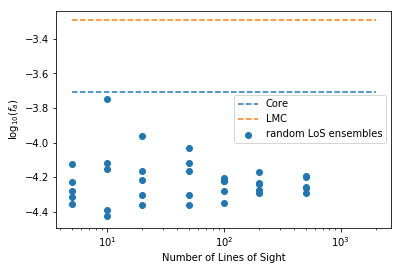

In [7]:
f = np.loadtxt('n_LoS_mNFW_testrand.txt')
f_new = np.loadtxt('n_LoS_mNFW_test_long.txt')
f_new = f_new[2:]

print(f)
#f = np.power(10,f)
#print(f)
f_core = f[0]
f_lmc = f[1]
f_los = f[2:]


Nn = np.array([5, 10, 20, 50, 100, 200, 500])
N = np.repeat(Nn,5)

plt.scatter(N, f_los, label = 'random LoS ensembles')
#plt.plot(Nn, f_new, label = 'default LoS choices')

#plt.plot(N, f_los_m2, label = '2 degrees mask')
#plt.plot(N, f_los_m5, label = '5 degrees mask')
plt.plot([5,2000],[f_core, f_core], '--', label = 'Core')
plt.plot([5,2000],[f_lmc, f_lmc], '--', label = 'LMC')

plt.legend()
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number of Lines of Sight')
plt.ylabel('$\log_{10}(f_a)$')

plt.savefig('./figures/linesofsight_rand.png')
plt.show()

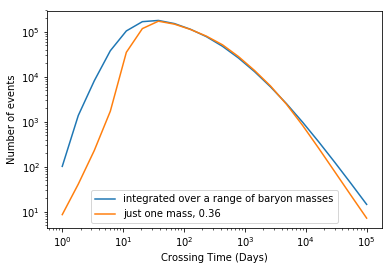

In [3]:
bar_events = np.loadtxt('baryon_events.txt')
bar_events_1 = np.loadtxt('baryon_events_one.txt')
bar_events_iso = np.loadtxt('baryon_events_iso.txt')

bar_time = np.sum(bar_events, axis=0)*17e9/100
bar_time_1 = np.sum(bar_events_1, axis=0)*17e9/100
bar_time_iso = np.sum(bar_events_iso, axis=0)*17e9/100


T = np.logspace(0,5,20)

plt.plot(T, bar_time, label = 'integrated over a range of baryon masses')
plt.plot(T, bar_time_1, label = 'just one mass, 0.36')
#plt.plot(T, bar_time_iso, label = 'isotropic velocities')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Crossing Time (Days)')
plt.ylabel('Number of events')
plt.legend()

plt.savefig('./figures/baryon_distributions.png')
plt.show()

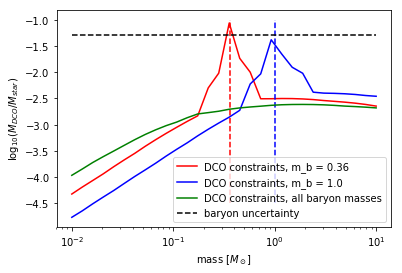

In [4]:
F = np.loadtxt('zoom_constraints_m036.txt')
F1 = np.loadtxt('zoom_constraints_m1.txt')
Ff = np.loadtxt('zoom_constraints_full_baryons.txt')

M = np.logspace(-2, 1, 30)

plt.plot(M, F, 'r-', label = 'DCO constraints, m_b = 0.36')
plt.plot([0.36, 0.36], [-4.5, -1], 'r--')

plt.plot(M, F1, 'b-', label = 'DCO constraints, m_b = 1.0')
plt.plot([1.0, 1.0], [-4.5, -1], 'b--')

plt.plot(M, Ff, 'g-', label = 'DCO constraints, all baryon masses')
#plt.plot([1.0, 1.0], [-4.5, -1], 'b--')

unc = np.log10(0.05)
plt.plot([1e-2, 1e1], [unc, unc], 'k--', label = 'baryon uncertainty')
plt.xscale('log')

plt.xlabel('mass [$M_\odot$]')
plt.ylabel('$\log_{10}(M_{DCO}/M_{star})$')
plt.legend()

plt.savefig('./figures/zoom_mass_spike.png')
plt.show()

